In [1]:
# Decision Tree Classification using sklearn


In [1]:
# Details:
#   Decision Tree Model Training and Testing
#   Post-Prunning
#   View Tree using matplotlib
#   Function created for automation

# Steps:-
    # - Loan dataset
    # - Train Test split
    # - Model initialization
    # - Train
    # - Post Prunning
    # - Test
    # - Accuracy Metrices



In [2]:
import pandas as pd
from sklearn.datasets import load_iris # used for dataset
import seaborn as sns # used for dataset

from sklearn.model_selection import train_test_split # to split train and test dataset
from sklearn.tree import DecisionTreeClassifier # to use model
from sklearn import tree # to use in ploting tree using matplotlib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # accuracy metrices

import sidetable

import matplotlib.pyplot as plt # used for the ploting tree
%matplotlib inline 

#### Load data
  source used iris data from sklearn/seaboarn -- both having same data 

In [3]:
iris = load_iris()
df = sns.load_dataset('iris')
df.head(), df.columns # species is target

(   sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa,
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'species'],
       dtype='object'))

#### Train Test Split

In [4]:
# independent features and dependent features

X = df.iloc[:,:-1]
y = iris.target # can be picked from df as well 

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test

(     sepal_length  sepal_width  petal_length  petal_width
 96            5.7          2.9           4.2          1.3
 105           7.6          3.0           6.6          2.1
 66            5.6          3.0           4.5          1.5
 0             5.1          3.5           1.4          0.2
 122           7.7          2.8           6.7          2.0
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [100 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

#### Model intialization

In [5]:
treeModel = DecisionTreeClassifier() 
# by default paramter # Need post prunning incase of overfitting

treeModel.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(453.375, 504.7714285714286, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(383.625, 427.11428571428576, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(523.125, 427.11428571428576, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(348.75, 349.4571428571429, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(279.0, 271.8, 'X[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(139.5, 194.14285714285717, 'X[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(69.75, 116.48571428571432, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(209.25, 116.48571428571432, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(139.5, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(279.0, 38.82857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(418.5, 194.14285714285717, 'X[1] <= 2.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text

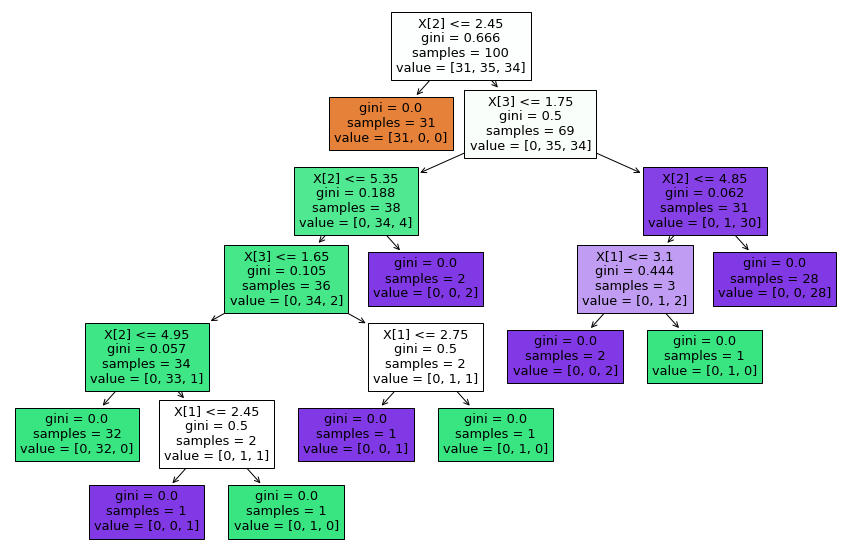

In [6]:

plt.figure(figsize=(15,10))
tree.plot_tree(treeModel, filled=True)

In [7]:
#### Function to automate the run

In [8]:
def decisionTreeModel(X_train=X_train, y_train=y_train, 
                      criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                                          min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                                          max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0):
    print(f"Model Parameters:\ncriterion = {criterion}, splitter = {splitter}, max_depth = {max_depth}, min_samples_split={min_samples_split}, \
                                          \nmin_samples_leaf = {min_samples_leaf}, min_weight_fraction_leaf = {min_weight_fraction_leaf}, max_features = {max_features},\
                                              \nrandom_state = {random_state}, max_leaf_nodes = {max_leaf_nodes}, min_impurity_decrease = {min_impurity_decrease},\
                                              \nclass_weight = {class_weight}, ccp_alpha = {ccp_alpha}")
    
    treeModel = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, 
                                          min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features, random_state=random_state, 
                                          max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, class_weight=class_weight, ccp_alpha=ccp_alpha)
    # print(treeModel)
    # print(X_train)
    # print(f"y_train: \n{y_train}")
    treeModel.fit(X_train, y_train)
    
    return treeModel
    
def draw_tree(model_name):
    from sklearn import tree
    plt.figure(figsize=(15,10))
    tree.plot_tree(model_name, filled=True)

def accuracy_metrices(y_pred, y_test, model_instance):
    """Accuracy metrices to check the Decision Tree model 
    """
    score = accuracy_score(y_pred, y_test)
    print(f"Score : {score}")
    print(f"\nclassification_report: \n{classification_report(y_pred, y_test)}")
    cm = confusion_matrix(y_pred, y_test)
    ConfusionMatrixDisplay(cm, model_instance.classes_, display_labels=[0, 1, 2]).plot()
    
    return score
   

In [9]:
#### Model Training

Model Parameters:
criterion = gini, splitter = best, max_depth = 2, min_samples_split=2,                                           
min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = None,                                              
random_state = None, max_leaf_nodes = None, min_impurity_decrease = 0.0,                                              
class_weight = None, ccp_alpha = 0.0


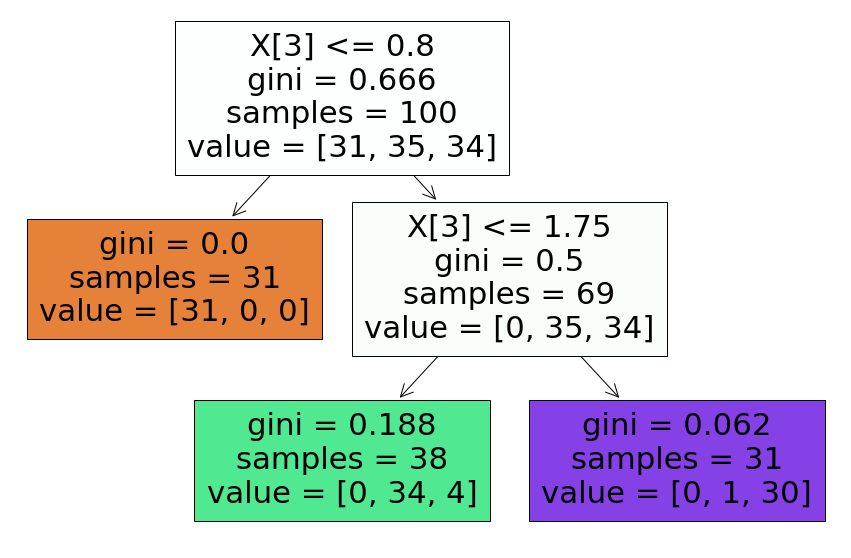

In [10]:
    
tree_model3 = decisionTreeModel(X_train=X_train, y_train=y_train,  max_depth=2) # Parameter max_depth for prunning the model
draw_tree(tree_model3)

In [11]:
#### Prediction

y_pred = tree_model3.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

#### Evaluate Model predictions


In [12]:
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]


c:\Users\Aye3243\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


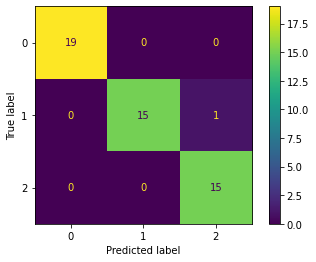

In [13]:
ConfusionMatrixDisplay(cm, tree_model3.classes_, ).plot()

Score : 0.98

classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



c:\Users\Aye3243\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.98

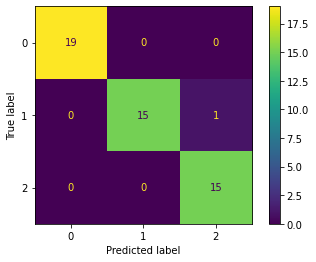

In [14]:
accuracy_metrices(y_pred, y_test, tree_model3)

In [15]:
df_final = X_test.copy()
df_final['y_test'] = y_test
df_final['y_pred'] = y_pred

In [16]:
df_final.stb.freq(['y_test', 'y_pred'])

,y_test,y_pred,count,percent,cumulative_count,cumulative_percent
0,0,0,19,38.0,19,38.0
1,2,2,15,30.0,34,68.0
2,1,1,15,30.0,49,98.0
3,2,1,1,2.0,50,100.0


In [ ]:
##### Accuracy Metrics

Model Parameters:
criterion = gini, splitter = best, max_depth = 3, min_samples_split=2,                                           
min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = None,                                              
random_state = None, max_leaf_nodes = None, min_impurity_decrease = 0.0,                                              
class_weight = None, ccp_alpha = 0.0


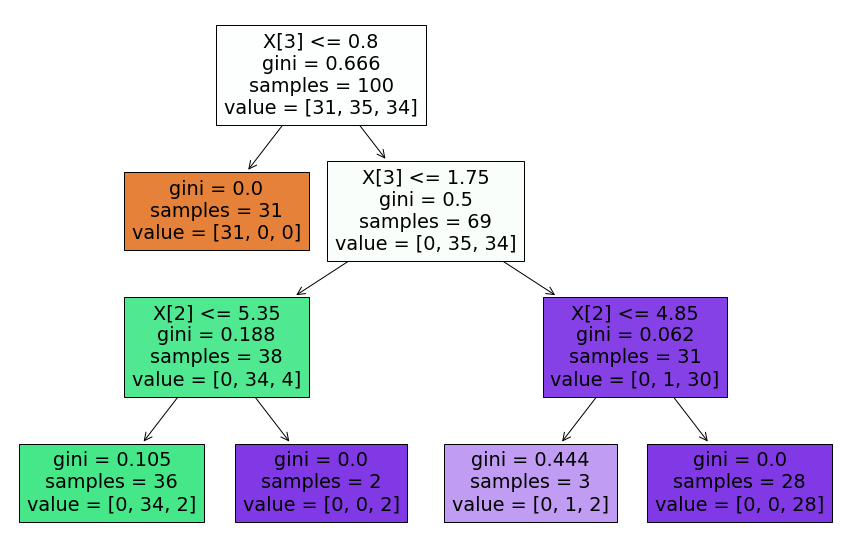

In [17]:
tree_model4 = decisionTreeModel(X_train=X_train, y_train=y_train,  max_depth=3) # Parameter max_depth for prunning the model
draw_tree(tree_model4)


Score : 0.98

classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



c:\Users\Aye3243\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.98

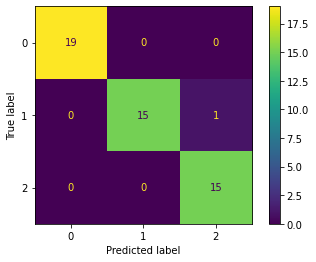

In [18]:
#### Prediction

y_pred4 = tree_model4.predict(X_test)
accuracy_metrices(y_pred4, y_test, tree_model4)